### Import Libraries:

In [316]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


### Read the Data:

In [317]:
wholesale_df=pd.read_csv("Wholesale customers data.csv")
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Scale numerical features

In [318]:

X = (wholesale_df.iloc[:,2:] - wholesale_df.iloc[:,2:].min())/( wholesale_df.iloc[:,2:].max()- wholesale_df.iloc[:,2:].min())
X =  pd.merge(wholesale_df.iloc[:,:2], X, how='left', left_index=True, right_index=True)
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,1,3,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,1,3,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,2,3,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,1,3,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


### check for NaN values

In [319]:
X.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### choose optimal number of clusters

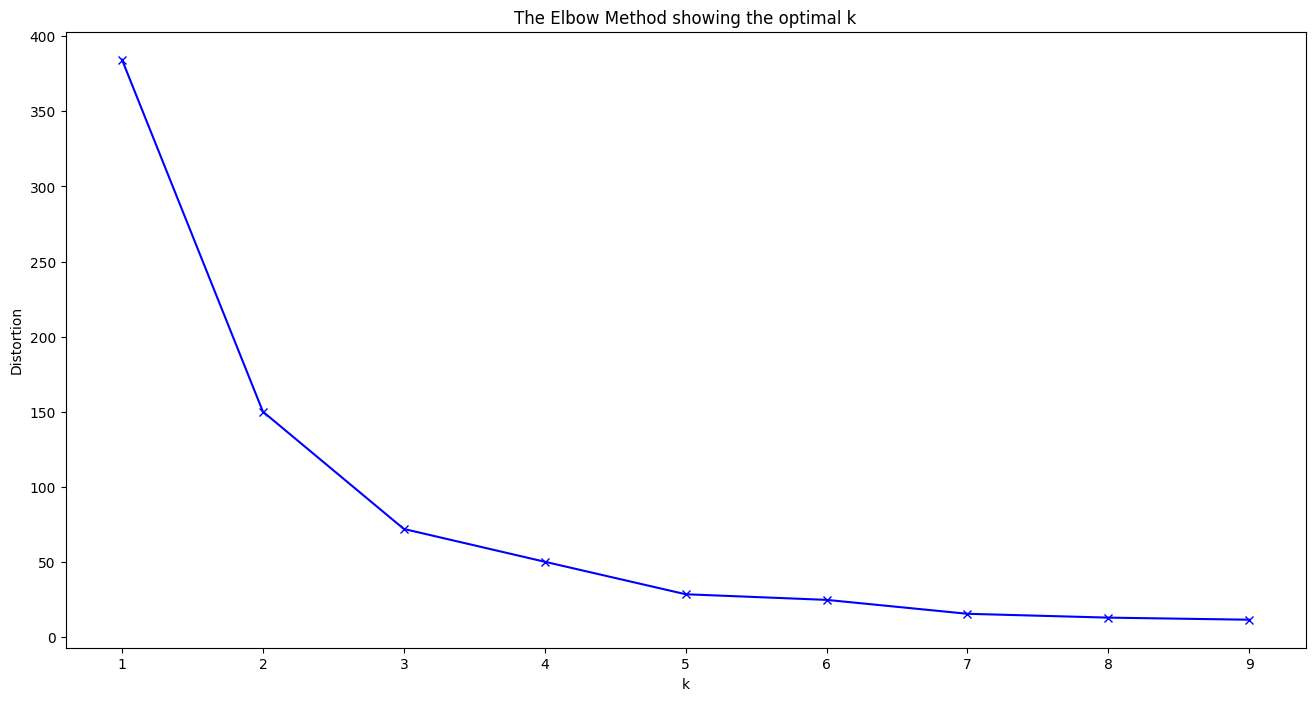

In [320]:
#Store different inertia values for different K:
distortions = []
K = range(1,10)
for k in K:
   kmeanModel = KMeans(n_clusters=k, random_state=0)
   kmeanModel.fit(X)
   distortions.append(kmeanModel.inertia_)

#Plot Distortions Vs Values of K:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### dendrogram 

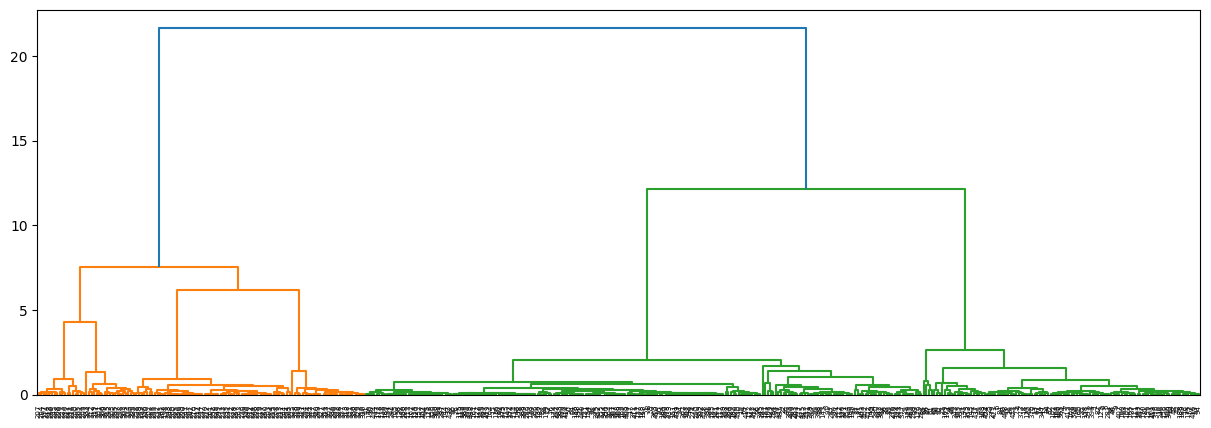

In [321]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Kmeans clustering

### Fit the model using n_clusters = 3 related to the Elbow of the graph

In [322]:
n_clusters = 3
model = KMeans(n_clusters = n_clusters, random_state=0)
model.fit(X)
clusters = model.predict(X)
clusters

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2,


### plot clusters related to columns i and j of dataset

C:\Users\mariah\AppData\Local\Temp\ipykernel_13680\2954695749.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])


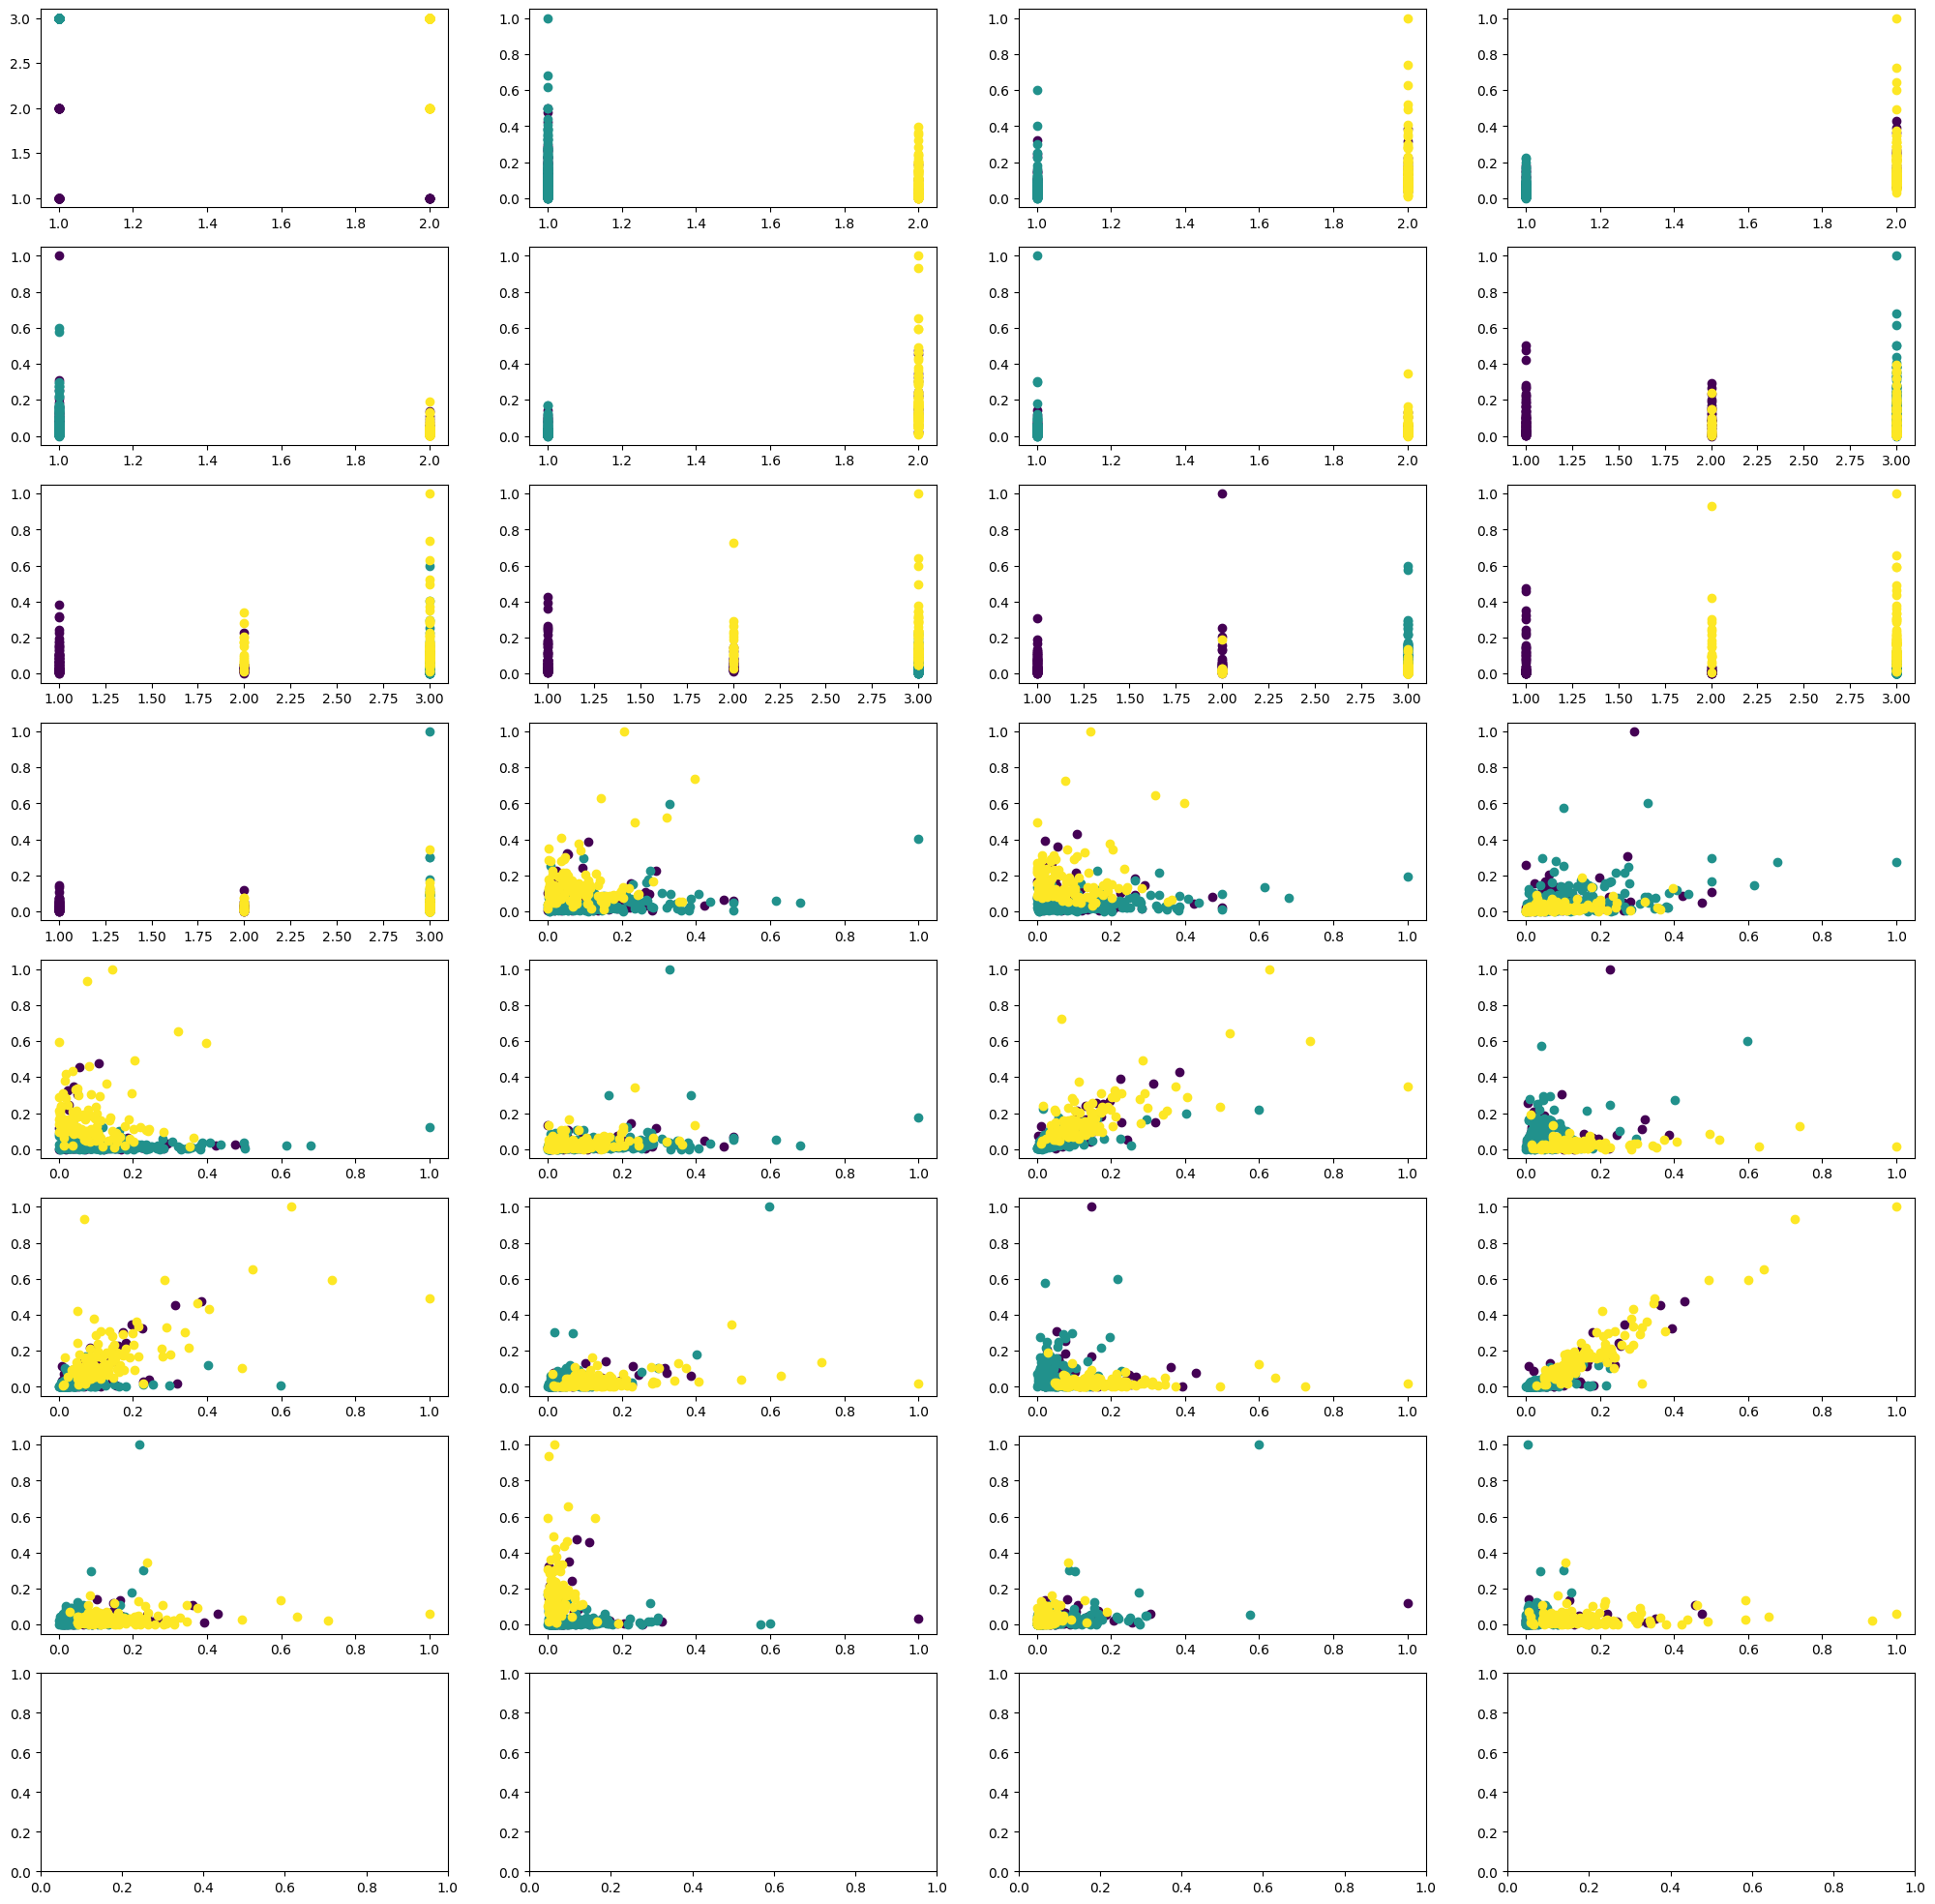

In [323]:
#use color map for each cluster
colors = cm.viridis(np.linspace(0, 1, n_clusters))
import math
plt.subplots(math.comb(len(X.columns), 2)//4+1,4, figsize=(25,25))
m = 1
#plot clusters for each column i and j of the data
for i in range(len(X.columns)-1):
    for k in range(i+1, len(X.columns)):
        plt.subplot(math.comb(len(X.columns), 2)//4+1,4, m)
        for j in range(n_clusters):
            plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])
        m = m + 1
plt.show()

### Evaluate performamce

In [324]:
score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score.round(3)}')

Silhouette Score: 0.684


# Hierachical clustering

### Fit the model

In [325]:

model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
clusters = model.fit_predict(X)
clusters

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,

### plot clusters for i and j columns in the dataset

C:\Users\mariah\AppData\Local\Temp\ipykernel_13680\2954695749.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])


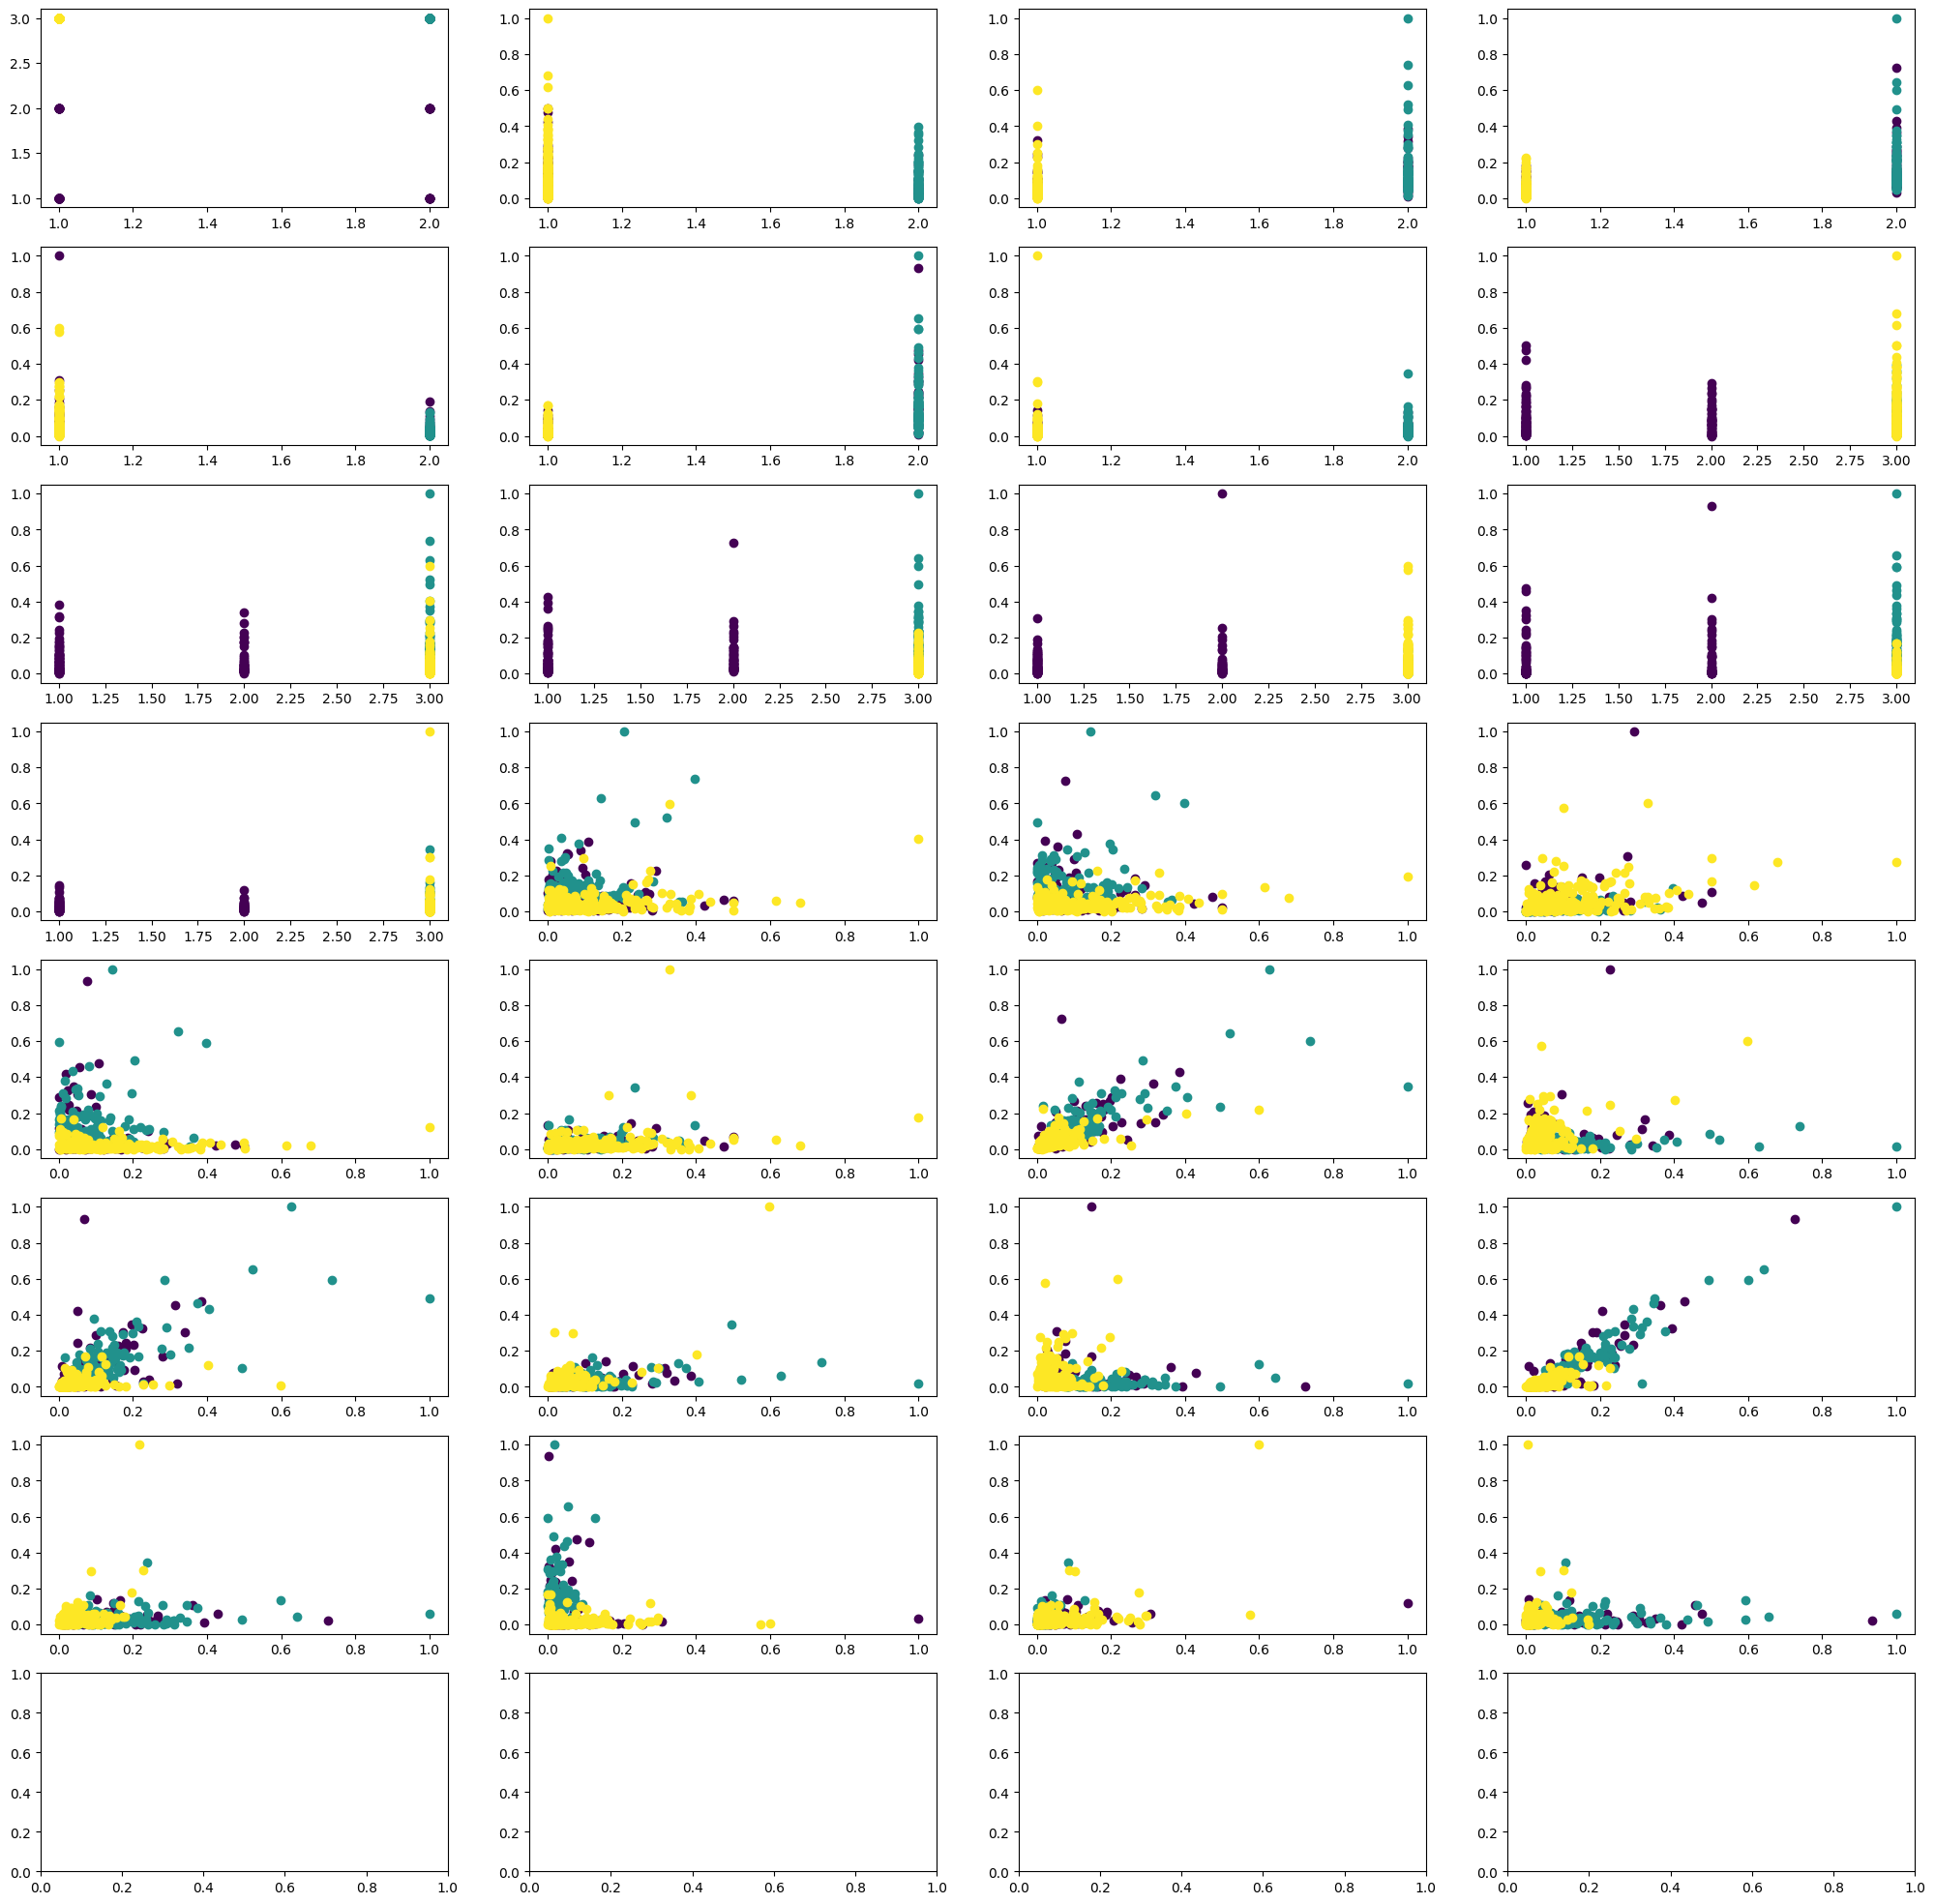

In [326]:
#use color map for each cluster
colors = cm.viridis(np.linspace(0, 1, n_clusters))
import math
plt.subplots(math.comb(len(X.columns), 2)//4+1,4, figsize=(25,25))
m = 1
#plot clusters for each column i and j of the data
for i in range(len(X.columns)-1):
    for k in range(i+1, len(X.columns)):
        plt.subplot(math.comb(len(X.columns), 2)//4+1,4, m)
        for j in range(n_clusters):
            plt.scatter(X.iloc[clusters == j, i], X.iloc[clusters ==j, k], c = colors[j])
        m = m + 1
plt.show()

### Measure the performance

In [327]:
score = silhouette_score(X, clusters)
print(f'Silhouette Score: {score.round(3)}')

Silhouette Score: 0.683


# Conclusion

<p>We can conclude that:</p>
<ul>
<li>there is no evident clustering related to numerical variables.</li>
<li>clustering is mainly focused on  the categorical variables,'chanel' and 'Region'.</li>
<li>The two methods, kmeans and hierachical clustering, have  the same performance of 0.68 as silhouette score.</li>
</ul>